<a href="https://colab.research.google.com/github/vnshanmukh/DATA-ANALYSIS-OF-COLLEGE-SCORECARD/blob/main/ait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS OF COLLEGE SCORECARD

###Importing libraries

In [286]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os,requests,io,zipfile
%matplotlib inline

### Extracting the zip file of Data and extracting it

In [287]:
# extracting the zip file of Data and extracting it
folder_name = r'../data'


if not os.path.exists(folder_name):
    os.makedirs(folder_name)


url = r'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
response = requests.get(url, stream = True)


with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    for elem in zf.namelist():
        zf.extract(elem, '../data')

### Reading the csv file of ACademic year of 2018 - 2019

In [288]:
dfRawData = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv', low_memory = False)

In [289]:
dfRawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Columns: 1986 entries, UNITID to SCUGFFN_POOLED
dtypes: float64(1902), int64(14), object(70)
memory usage: 103.1+ MB


In [290]:
dfRawData.shape

(6806, 1986)

AS we can see that the data file has 1986 columns and the quality of is not good.
For the analysis we are taking only limited number of columns

In [291]:
dataSet = ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'NUMBRANCH', 'HIGHDEG', 'PREDDEG', 'CONTROL', 'DISTANCEONLY', 
                    'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 
                    'ACTCM75', 'UGDS', 'UG25ABV', 'PCTFLOAN', 'CDR3','COSTT4_A','ADM_RATE']
df_dataSet = dfRawData[dataSet]

# Data Cleaning


In [292]:
df = df_dataSet.copy()

In [293]:
df.describe()

,UNITID,NUMBRANCH,HIGHDEG,PREDDEG,CONTROL,DISTANCEONLY,TUITFTE,AVGFACSAL,ADM_RATE_ALL,SATVR25,...,SATMT25,SATMT75,ACTCM25,ACTCM75,UGDS,UG25ABV,PCTFLOAN,CDR3,COSTT4_A,ADM_RATE
count,6.806000e+03,6806.000000,6806.000000,6806.000000,6806.000000,6331.000000,6304.000000,4012.000000,2242.000000,1239.000000,...,1242.000000,1242.000000,1273.000000,1273.000000,6041.000000,0.0,6014.000000,5879.000000,3431.000000,2006.000000
mean,2.126810e+06,3.523509,2.222892,1.833823,2.087570,0.008214,11099.011104,6858.799103,0.681198,516.617433,...,510.353462,609.377617,20.609584,25.958366,2522.160735,NaN,0.462107,0.107210,26956.896823,0.678958
std,7.640544e+06,8.751410,1.362394,1.070275,0.835281,0.090263,12995.482144,2534.714614,0.213015,65.995500,...,70.706483,72.226097,3.971297,3.725738,5657.459316,NaN,0.279112,0.074038,15831.620491,0.217596
min,1.006540e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,244.000000,...,283.000000,400.000000,6.000000,11.000000,0.000000,NaN,0.000000,0.000000,3990.000000,0.000000
25%,1.740315e+05,1.000000,1.000000,1.000000,1.000000,0.000000,4836.750000,5200.750000,0.562700,470.000000,...,470.000000,560.000000,18.000000,23.000000,105.000000,NaN,0.227700,0.049000,14055.500000,0.552575
50%,2.282095e+05,1.000000,2.000000,2.000000,2.000000,0.000000,9231.500000,6574.000000,0.700300,510.000000,...,500.000000,598.000000,20.000000,26.000000,438.000000,NaN,0.514900,0.096000,22581.000000,0.702700
75%,4.527585e+05,2.000000,4.000000,3.000000,3.000000,0.000000,14052.000000,8198.500000,0.844200,550.000000,...,540.000000,640.000000,22.000000,28.000000,2117.000000,NaN,0.680250,0.151000,35765.500000,0.844125
max,4.914640e+07,74.000000,4.000000,4.000000,3.000000,1.000000,455440.000000,20484.000000,1.000000,740.000000,...,790.000000,800.000000,35.000000,36.000000,88921.000000,NaN,1.000000,0.666000,96375.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, ' Cost of attendance')

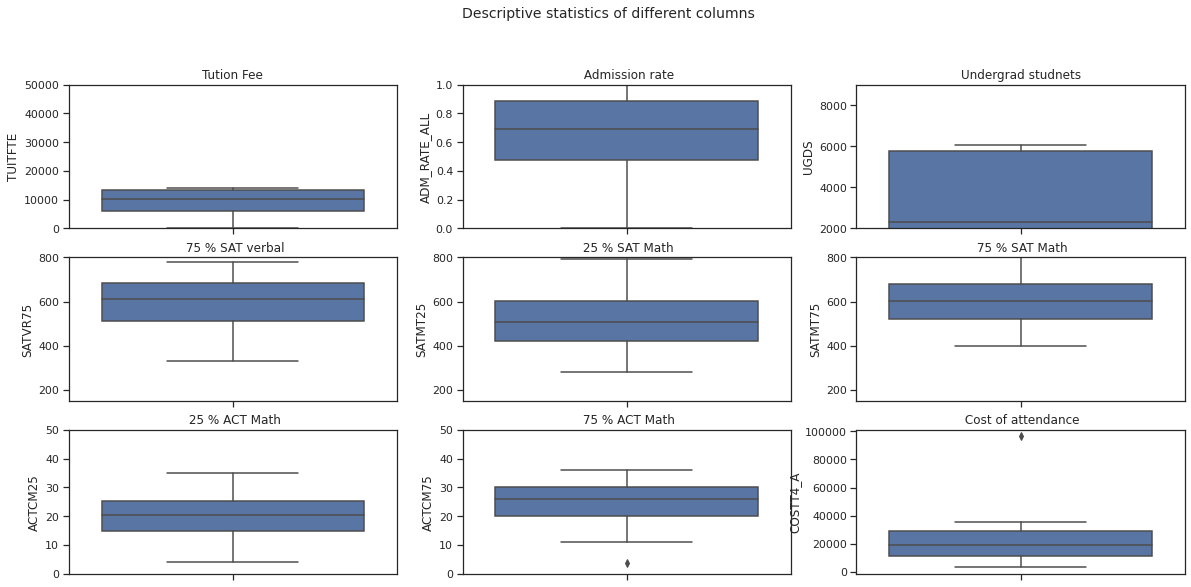

In [294]:
d = df.describe()
plt.figure(figsize = (20,9))
plt.subplot(3,3,1)
plt.suptitle('Descriptive statistics of different columns',
            x = 0.5, y = 1, fontsize = 14)
ax1 =sns.boxplot(y ='TUITFTE',data =d)
plt.title("Tution Fee")
plt.ylim(0,50000)
plt.subplot(3,3,2)
ax2 =sns.boxplot(y ='ADM_RATE_ALL',data =d)
plt.ylim(0,1)
plt.title(" Admission rate")
plt.subplot(3,3,3)
ax2 =sns.boxplot(y ='SATVR25',data =d)
plt.ylim(2000,9000)
plt.title(" 25 % SAT verbal")
plt.subplot(3,3,3)
ax2 = sns.boxplot(y="UGDS",data =d)
plt.title("Undergrad studnets")
plt.subplot(3,3,4)
ax2 =sns.boxplot(y ='SATVR75',data =d)
plt.ylim(150,800)
plt.title(" 75 % SAT verbal")
plt.subplot(3,3,5)
ax2 =sns.boxplot(y ='SATMT25',data =d)
plt.ylim(150,800)
plt.title(" 25 % SAT Math")
plt.subplot(3,3,6)
ax2 =sns.boxplot(y ='SATMT75',data =d)
plt.ylim(150,800)
plt.title(" 75 % SAT Math")
plt.subplot(3,3,7)
ax2 =sns.boxplot(y ='ACTCM25',data =d)
plt.ylim(0,50)
plt.title(" 25 % ACT Math")
plt.subplot(3,3,8)
ax2 =sns.boxplot(y ='ACTCM75',data =d)
plt.ylim(0,50)
plt.title(" 75 % ACT Math")
plt.subplot(3,3,9)
ax2 =sns.boxplot(y ='COSTT4_A',data =d)
plt.title(" Cost of attendance")



In [295]:
df.shape

(6806, 24)

As above we have reduced to 23 columns

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UNITID        6806 non-null   int64  
 1   INSTNM        6806 non-null   object 
 2   CITY          6806 non-null   object 
 3   STABBR        6806 non-null   object 
 4   NUMBRANCH     6806 non-null   int64  
 5   HIGHDEG       6806 non-null   int64  
 6   PREDDEG       6806 non-null   int64  
 7   CONTROL       6806 non-null   int64  
 8   DISTANCEONLY  6331 non-null   float64
 9   TUITFTE       6304 non-null   float64
 10  AVGFACSAL     4012 non-null   float64
 11  ADM_RATE_ALL  2242 non-null   float64
 12  SATVR25       1239 non-null   float64
 13  SATVR75       1239 non-null   float64
 14  SATMT25       1242 non-null   float64
 15  SATMT75       1242 non-null   float64
 16  ACTCM25       1273 non-null   float64
 17  ACTCM75       1273 non-null   float64
 18  UGDS          6041 non-null 

* STABBR

In [297]:
df.STABBR.unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI', 'IA', 'KS',
       'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [298]:
df.STABBR.nunique()

59

There are 59 states. US has only 50 states this means only one thing Union teritories must have been inlcuded. Below are the states of the US

In [299]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
         'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
         'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

Using python sets we can find the union teritories other than US states

In [300]:
set(df.STABBR.unique()) - set(states)

{'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI'}

From above we can can see that 9 union teritories are also included.

* HIGHDEG

In [301]:
df.HIGHDEG.unique()

array([4, 2, 3, 1, 0])

From the documentation 
 - 1 = Certificate
 - 2 = Associate's
 - 3 = Bachelor's 
 - 4 = Graduate's 
 - 0 = nan

Replacing the numeric values with text values

In [302]:
df["HIGHDEG"]= df["HIGHDEG"].replace([1,2,3,4,0], ["Certificate","Associate's","Bachelor's","Graduate's","nan"] )

PREDDEG as same as HIGHDEG from the documentation 
 - 1 = Certificate
 - 2 = Associate's
 - 3 = Bachelor's 
 - 4 = Graduate's 
 - 0 = nan

In [303]:
df.PREDDEG.unique()

array([3, 1, 2, 4, 0])

Replaceing PREDDEG numeric values to text values

In [304]:
df["PREDDEG"]= df["PREDDEG"].replace([1,2,3,4,0], ["Certificate","Associate's","Bachelor's","Graduate's","nan"] )

* CONTROL


From the documentation mapping is as follows:

- 1 : Public
- 2 : Private Nonprofit
- 3 : Private For-Profit

In [305]:
df.CONTROL.unique()

array([1, 2, 3])

In [306]:
df["CONTROL"]= df["CONTROL"].replace([1,2,3], ["Public","Private Non Profit","Private For Profit"] )

* DISTANCEONLY

From the documentation mapping is as follows:

- 0 : NO
- 1 : Yes

In [307]:
df.DISTANCEONLY.unique()

array([ 0.,  1., nan])

In [308]:
df["DISTANCEONLY"]= df["DISTANCEONLY"].replace([0,1], ["No","Yes"] )

In [309]:
df.head()

,UNITID,INSTNM,CITY,STABBR,NUMBRANCH,HIGHDEG,PREDDEG,CONTROL,DISTANCEONLY,TUITFTE,...,SATMT25,SATMT75,ACTCM25,ACTCM75,UGDS,UG25ABV,PCTFLOAN,CDR3,COSTT4_A,ADM_RATE
0,100654,Alabama A & M University,Normal,AL,1,Graduate's,Bachelor's,Public,No,7413.0,...,420.0,510.0,16.0,19.0,4990.0,NaN,0.7503,0.182,22489.0,0.8986
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,Graduate's,Bachelor's,Public,No,13177.0,...,490.0,620.0,21.0,29.0,13186.0,NaN,0.5127,0.057,24347.0,0.9211
2,100690,Amridge University,Montgomery,AL,1,Graduate's,Bachelor's,Private Non Profit,Yes,14273.0,...,NaN,NaN,NaN,NaN,351.0,NaN,0.8962,0.110,17680.0,NaN
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,Graduate's,Bachelor's,Public,No,8677.0,...,450.0,680.0,25.0,31.0,7458.0,NaN,0.4192,0.059,23441.0,0.8087
4,100724,Alabama State University,Montgomery,AL,1,Graduate's,Bachelor's,Public,No,10160.0,...,420.0,510.0,16.0,20.0,3903.0,NaN,0.7845,0.203,21476.0,0.9774


# Data Analysis

## 1. Number of colleges controlled by different types?

Text(0.5, 1.0, 'Distribution of type of control of colleges')

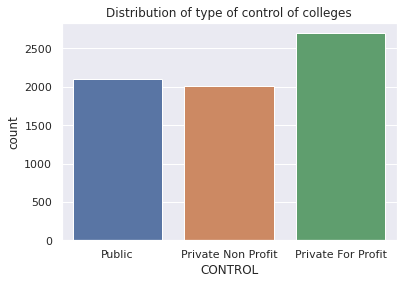

In [310]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="CONTROL", data=df)
plt.title('Distribution of type of control of colleges')

* From ablove grpah we can analyse that the colleges run by the private instutions for profit are very high.

##2. What are the costs of attendance for different types of control colleges?

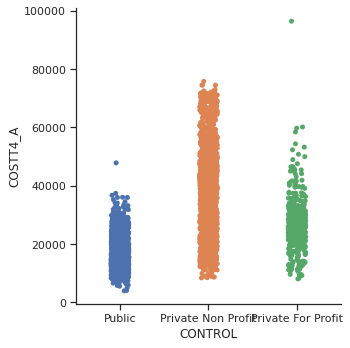

In [311]:
sns.set_theme(style="ticks")
ax = sns.catplot(y='COSTT4_A',x='CONTROL',data=df)

* From the above scatter plot we can notice that attending the public college way less than attending the prive colleges.

## 3. What are the top 20 colleges with high cost of attendance?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


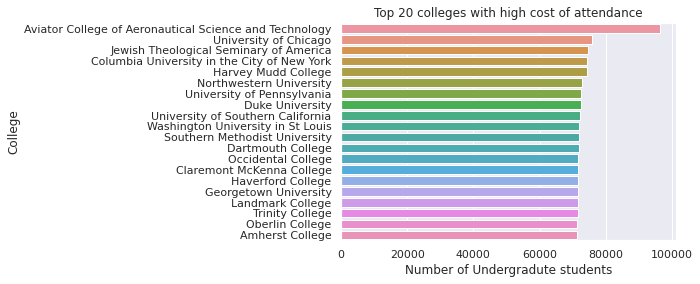

In [312]:
sns.set_theme(style="darkgrid")

x = list(df.nlargest(20, 'COSTT4_A')['COSTT4_A']) 

y = list(df.nlargest(20, 'COSTT4_A')['INSTNM']) 

sns.barplot(x,y)
plt.title('Top 20 colleges with high cost of attendance')
plt.xlabel('Number of Undergradute students')
plt.ylabel('College');

## 4.What is the distribution of Net Tuition fees of colleges in US?

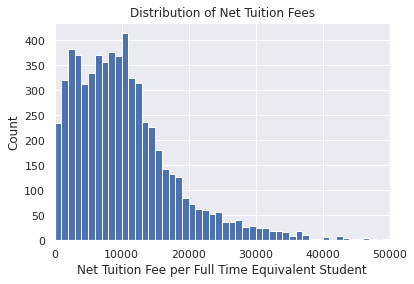

In [313]:
bins = np.arange(0, df.TUITFTE.max() + 1000, 1000)

plt.hist(data = df, x = 'TUITFTE', bins = bins);
plt.xlim(0,50000)

plt.title('Distribution of Net Tuition Fees')
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student')
plt.ylabel('Count');

* Most number of colleges are having below 20000 for a full time student.

## 5.What is the tuition fee distribution for different type of control colleges?

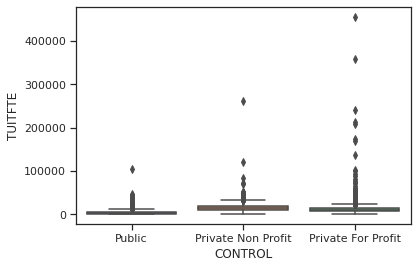

In [314]:
sns.set_theme(style="ticks")
ax = sns.boxplot(y='TUITFTE',x='CONTROL',data=df)

* Net tution fee for a full student for different type of control of colleges doesn't vary much and all colleges fall bewlow 20000 

## 6.What are the top 20 colleges with high tuition fee?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


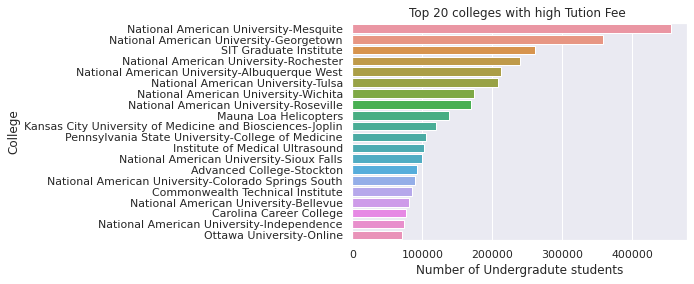

In [315]:
sns.set_theme(style="darkgrid")

x = list(df.nlargest(20, 'TUITFTE')['TUITFTE']) 

y = list(df.nlargest(20, 'TUITFTE')['INSTNM']) 

sns.barplot(x,y)
plt.title('Top 20 colleges with high Tution Fee ')
plt.xlabel('Number of Undergradute students')
plt.ylabel('College');

## 7.What are the top 20 states with most number of colleges?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


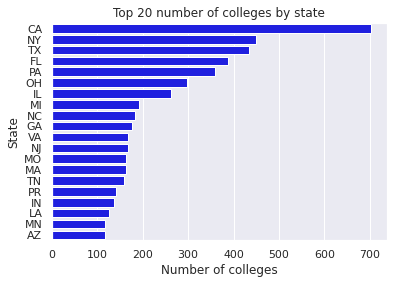

In [316]:
sns.set_theme(style="darkgrid")
x = list(df.STABBR.value_counts().index)
y = df.STABBR.value_counts().values
x = x[:20]
y = y[:20]
ax = sns.barplot(y,x,color ='blue')
plt.title('Top 20 number of colleges by state')
plt.xlabel('Number of colleges')
plt.ylabel('State');

## 8.What are the top 20 states with most number of colleges?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


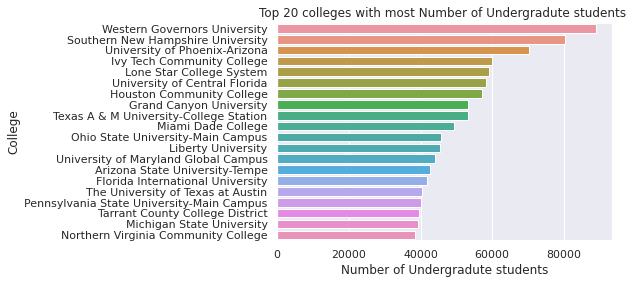

In [317]:
sns.set_theme(style="darkgrid")

x = list(df.nlargest(20, 'UGDS')['UGDS']) 

y = list(df.nlargest(20, 'UGDS')['INSTNM']) 

sns.barplot(x,y)
plt.title('Top 20 colleges with most Number of Undergradute students ')
plt.xlabel('Number of Undergradute students')
plt.ylabel('College');

## 9. What are the Admission rates of all campuses?

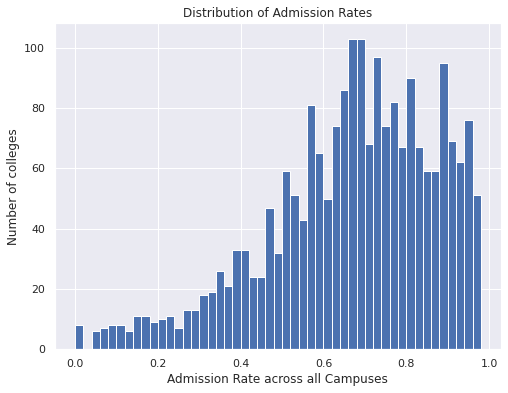

In [318]:
bins = np.arange(0, 1, 0.02)

plt.figure(figsize = (8,6))
plt.hist(data = df, x = 'ADM_RATE_ALL', bins = bins)

plt.title('Distribution of Admission Rates')
plt.xlabel('Admission Rate across all Campuses')
plt.ylabel('Number of colleges');

* From above graph all colleges are having the high acceptance rate.

## 10.What are the most Competitive colleges?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


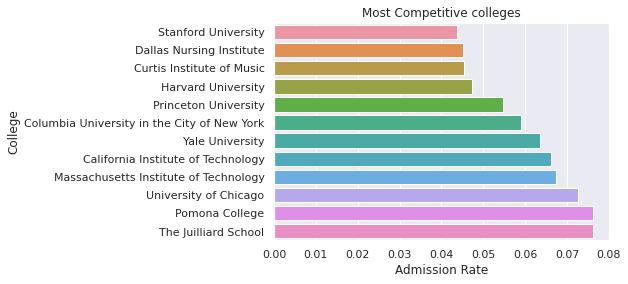

In [319]:
sns.set_theme(style="darkgrid")

x = list(df.nsmallest(20, 'ADM_RATE_ALL')['ADM_RATE_ALL']) 

y = list(df.nsmallest(20, 'ADM_RATE_ALL')['INSTNM'])
x = x[8:]
y = y[8:]
sns.barplot(x,y)
plt.title('Most Competitive colleges')
plt.xlabel('Admission Rate')
plt.ylabel('College');

* we can analyse from the graph standford is most competitive college with only 4 % acceptance rate.

## 11.What is the distribution of number of branches per college?

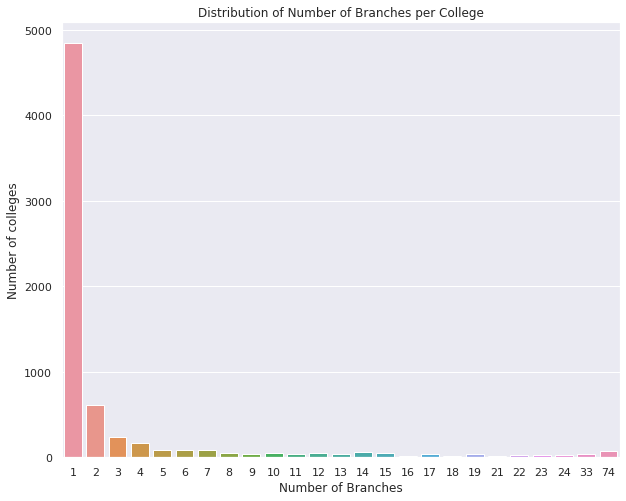

In [320]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="NUMBRANCH", data=df)
plt.title('Distribution of Number of Branches per College')
plt.xlabel('Number of Branches')
plt.ylabel('Number of colleges');

* Most of the colleges are having only 1 branch. oNly few are having more than 1 brannch

## 12.What are the top ten colleges with high number of branches?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


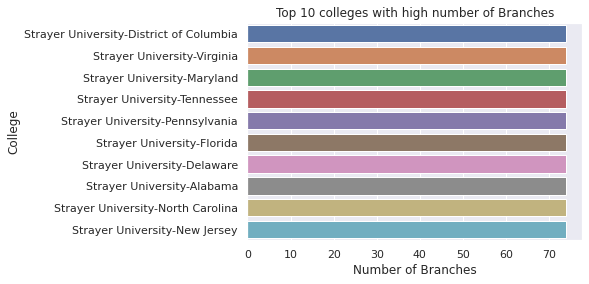

In [321]:
sns.set_theme(style="darkgrid")

x = list(df.nlargest(10, 'NUMBRANCH')['NUMBRANCH']) 

y = list(df.nlargest(10, 'NUMBRANCH')['INSTNM'])
sns.barplot(x,y)
plt.title('Top 10 colleges with high number of Branches')
plt.xlabel('Number of Branches')
plt.ylabel('College');

* From above graphs we can see that all Strayer universities are having the more than 70 branches.

In [322]:
#Top 10 states where Number of colleges having more than 70 branches
x = df.query('NUMBRANCH > 70').groupby("STABBR").count().NUMBRANCH.sort_values(ascending=False)
x.head(10)

STABBR
VA    11
GA    10
FL     9
TX     9
NC     7
PA     6
MD     5
TN     4
DC     3
NJ     3
Name: NUMBRANCH, dtype: int64

* Above is the list of states with number of colleges where the number of brnaches are more than 70.

## 13. What are the Distrubution of Degress?

Text(0.5, 1.0, 'Distrubution of Degress')

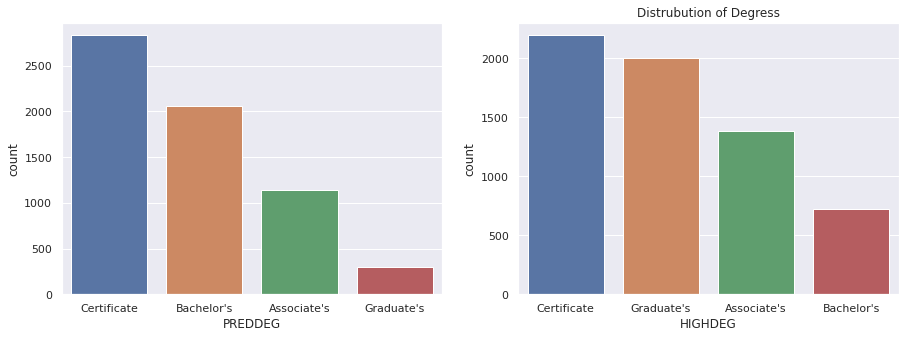

In [323]:
df_preddeg = df[df.PREDDEG != 'nan']
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='PREDDEG',data=df_preddeg,order = df_preddeg['PREDDEG'].value_counts().index)

df_highdeg = df[df.HIGHDEG != 'nan']
plt.subplot(1,2,2)
ax1 = sns.countplot(x='HIGHDEG',data=df_highdeg,order = df_highdeg['HIGHDEG'].value_counts().index)
plt.title("Distrubution of Degress")

* A Certificate is the most predominantly conferred award. It is clear that most institutes that have their predominant award as a Certificate, also have their Highest award as the same

## 14. What is good score of SAT and ACT? 

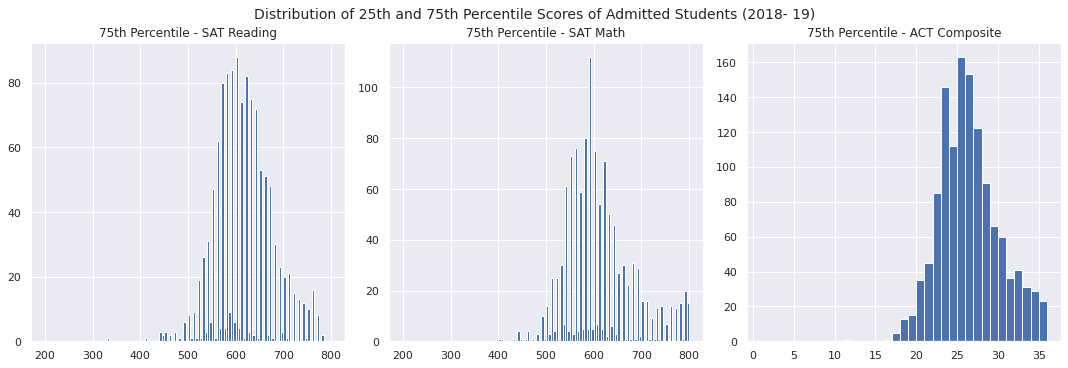

In [324]:
def hist(series, title, act = False):
    if act == True:
        bins = np.arange(1, 36 + 1, 1) 
        plt.hist(x = series, bins = bins)
        plt.title(title);
    else:
        bins = np.arange(200, 800 + 5, 5)
        plt.hist(x = series, bins = bins)
        plt.title(title);
    
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
hist(df.SATVR75, '75th Percentile - SAT Reading')
plt.subplot(1, 3, 2)
hist(df.SATMT75, '75th Percentile - SAT Math')
plt.subplot(1, 3, 3)
hist(df.ACTCM75, '75th Percentile - ACT Composite', act = True)
plt.suptitle('Distribution of 25th and 75th Percentile Scores of Admitted Students (2018- 19)',
            x = 0.5, y = 1.02, fontsize = 14)
plt.tight_layout();

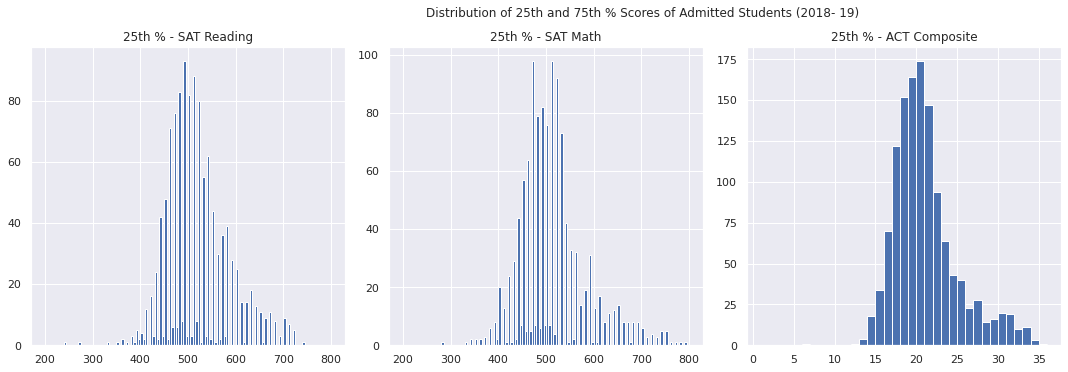

In [325]:
def hist(series, title, act = False):
    if act == True:
        bins = np.arange(1, 36 + 1, 1) 
        plt.hist(x = series, bins = bins)
        plt.title(title);
    else:
        bins = np.arange(200, 800 + 5, 5)
        plt.hist(x = series, bins = bins)
        plt.title(title);
    
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
hist(df.SATVR25, '25th % - SAT Reading')
plt.subplot(1, 3, 2)
hist(df.SATMT25, '25th % - SAT Math')
plt.subplot(1, 3, 3)
hist(df.ACTCM25, '25th % - ACT Composite', act = True)
plt.suptitle('Distribution of 25th and 75th % Scores of Admitted Students (2018- 19)',
            x = 0.6, y = 1.03, fontsize = 12)
plt.tight_layout();

* Most universities have their 75th Percentile for both Reading and Math fall around 600.
* Similarly most universities have their 25th Percentile fall around 500.
* From the observations it can be said that a good ACT Composite score is anywhere between 20 and 26.


## 15. what is Corelation bewteen 75% score of SAT and ACT?

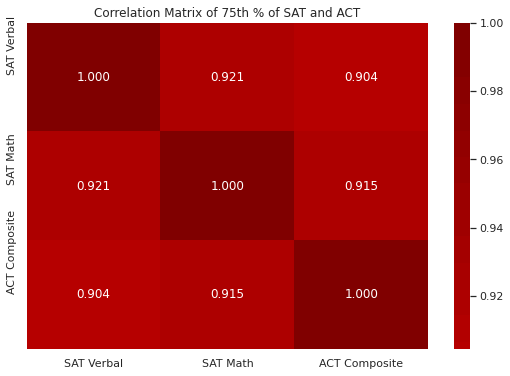

In [326]:
plt.figure(figsize = (9, 6))
tests75 = df[['SATVR75', 'SATMT75', 'ACTCM75']].rename({'SATVR75':'SAT Verbal', 'SATMT75':'SAT Math','ACTCM75':'ACT Composite'}, axis = 'columns')
sns.heatmap(tests75.corr(), annot = True, fmt = '.3f', cmap = 'jet', center = 0)
plt.yticks([0.2, 1.25, 2.1])
plt.title('Correlation Matrix of 75th % of SAT and ACT');

* We can say that if a certain institute has a high 75th Percentile of SAT, it is very likely that the 75th percentile for ACT also will be high as well, viceversa.

## 16. Does Colleges with low Admission rate accepts students with high SAT scores?

Text(0, 0.5, '75th % - SAT Math')

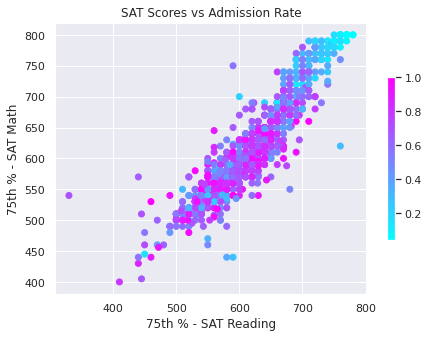

In [327]:
plt.figure(figsize = (7, 5))
plt.scatter(data = df, x = 'SATVR75', y = 'SATMT75', c = 'ADM_RATE_ALL', cmap = 'cool')
plt.colorbar(shrink = 0.6)
plt.title('SAT Scores vs Admission Rate')
plt.xlabel('75th % - SAT Reading')
plt.ylabel('75th % - SAT Math')

* The light datapoints on the upper right of the scatter plot represent the most selective institutes in the US. These institutes require higher SAT scores but even then have a very low admission rate

## 17. what is Distribution of percentage of students who receive federal loans?


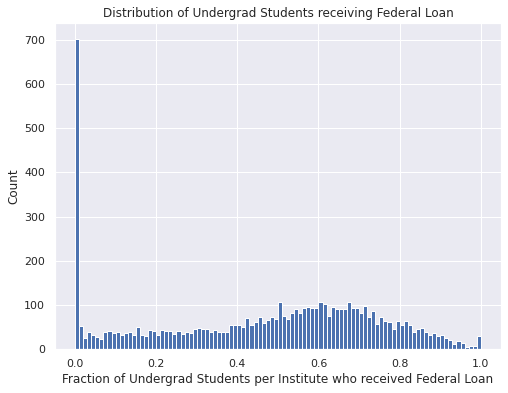

In [328]:
b = np.arange(0, 1 + 0.01, 0.01)
plt.figure(figsize = (8, 6))
plt.hist(data = df, x = 'PCTFLOAN', bins = b)
plt.title('Distribution of Undergrad Students receiving Federal Loan')
plt.xlabel('Fraction of Undergrad Students per Institute who received Federal Loan')
plt.ylabel('Count');

* From above graph we can notice that almost 700 institues students doesn't recieve any federal Loan.

## 18. Students from which type of control colleges most likely to recieve loan?

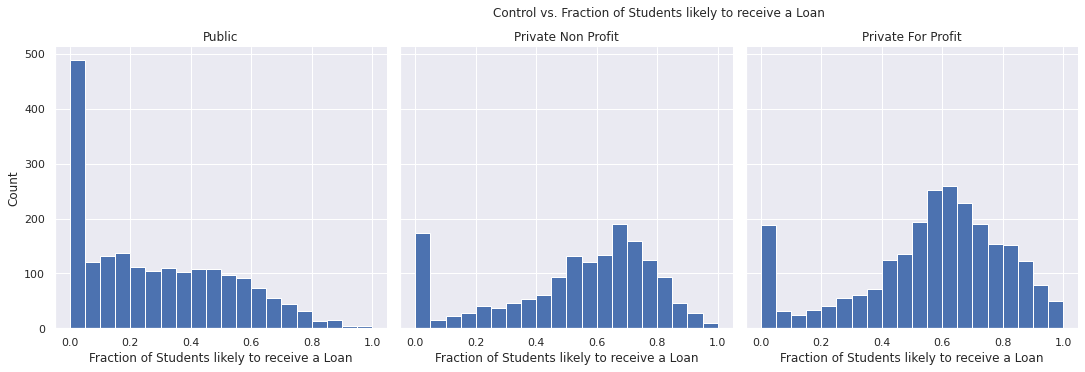

In [329]:
bins = np.arange(0, 1 + 0.05, 0.05)
p = sns.FacetGrid(data = df, col = 'CONTROL', height = 5)
p.map(plt.hist, 'PCTFLOAN', bins = bins)
p.set_titles('{col_name}');
p.set_xlabels('Fraction of Students likely to receive a Loan')
p.set_ylabels('Count')
plt.suptitle('Control vs. Fraction of Students likely to receive a Loan',x = 0.6, y = 1.03, fontsize = 12);

* Students from Public Colleges are less likely to receive loans. A large fraction of students from these public collges do not receive a federal loan.

## 19.what are earnings of faculty in diatance only colleges vs on campus and distance colleges?

Text(0.5, 0, '')

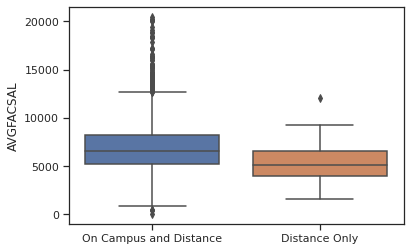

In [330]:
sns.set_theme(style="ticks")
sns.boxplot(y='AVGFACSAL',x='DISTANCEONLY',data=df)
plt.xticks([0, 1], ['On Campus and Distance', 'Distance Only'])
plt.xlabel("")

* we can notice that average median salary of disatnceonly college is 2000 dollar less than on cmapus and Distance.

## 20. What is the distrubution of admission rate less tahn 50% vs tution fee less than average?

Text(0, 0.5, 'ADMISSION RATE')

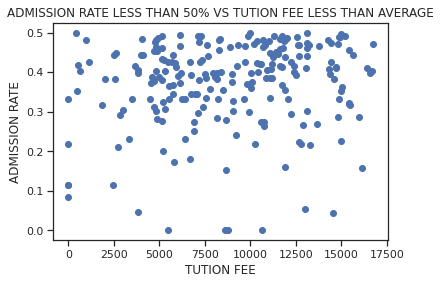

In [331]:
adm_less_than_mean = (df[df['ADM_RATE'] < 0.50])
avg_less_than_mean = (adm_less_than_mean[adm_less_than_mean['TUITFTE'] < adm_less_than_mean['TUITFTE']\
                         .mean()])
plt.scatter(avg_less_than_mean['TUITFTE'],avg_less_than_mean['ADM_RATE'])
plt.title("ADMISSION RATE LESS THAN 50% VS TUTION FEE LESS THAN AVERAGE")
plt.xlabel('TUTION FEE')
plt.ylabel('ADMISSION RATE')

# Conclusion
* State of california has most number of Institues.
* Even though the large number of enrollments happened in Public Colleges, Private For-Profit colleges are the common in the US. There are about 24% more Private For-Profits than there are Public or Private Nonprofit Schools.
* Certificate is the most common degreee in US followed by bachelor's.`
* Average salary of distance only is less compared to oncampus and disatnce.
* Most of colleges in US doesn;t have many branches.
* From the data and above graphs we can say that  good SAT score falls in the range 500 - 600 for both Reading and Math while a good ACT Composite score can be anywhere between 20 and 26.
* Colleges that have a high admission rate have lower requirements on test scores.
* If a certain institute has a high 75th Percentile of SAT, it is very likely that the 75th percentile for ACT also will be high as well, viceversa.
* About 90% more students from Private Schools receive federal loans than from Public Schools.

# Limitations
*  Analysis we have chosen to study the data for the academic year 2018 - 2019. Some of the patterns that we saw here may not exist for other years.
* As per the dataset only 14% of colleges have reported their data on test score, this puts us in limitation where answering the question admission rate on basis of test score.
* Cost of attendance, Tution fee and salary eraning these analysis are done on average.
* For the entire data for academic year 2018 - 2019, we have chosen a limited number of data fields to analyze. This analysis is in not the complete analysis of the U. S. Educational system. 

# References
* https://collegescorecard.ed.gov/assets/InstitutionDataDocumentation.pdf
* https://catalog.data.gov/dataset/college-scorecard
* https://collegescorecard.ed.gov/data/documentation/ 
* https://seaborn.pydata.org/
* https://matplotlib.org/